In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
def load_dataset(path, batch_size=32, image_size=(256, 256), test_ds=False):
    # Load images from the specified path
    dataset = tf.keras.utils.image_dataset_from_directory(
        path,
        image_size=image_size,
        batch_size=batch_size,
        label_mode=None,  # Only images (no labels)
        seed=42
    )
    # Shuffle the dataset if it is a test dataset
    if test_ds:
        dataset = dataset.shuffle(buffer_size=1000)
    # Normalize the images
    dataset = dataset.map(lambda x: x / 255.0)
    return dataset


In [3]:
# Define the paths to your data
PATH = 'Distributed_haze1k/'

# Load your datasets with consistent batch size
batch_size = 32

train_ds = load_dataset(PATH + 'train/', batch_size=batch_size)
moderate_test_ds = load_dataset(PATH + 'test_moderate/', batch_size=batch_size, test_ds=True)
thick_test_ds = load_dataset(PATH + 'test_thick/', batch_size=batch_size, test_ds=True)
thin_test_ds = load_dataset(PATH + 'test_thin/', batch_size=batch_size, test_ds=True)


Found 1800 files.
Found 90 files.
Found 90 files.
Found 90 files.


In [7]:
def call(self, inputs):
    # Check that the input is not None and has the expected shape and type
    assert inputs is not None, "Input data should not be None"
    assert inputs.shape[-3:] == (256, 256, 3), f"Unexpected input shape: {inputs.shape[-3:]}"
    
    # Forward pass through encoder
    encoded = self.encoder(inputs)
    # Forward pass through decoder
    decoded = self.decoder(encoded)
    # Return the reconstructed images
    return decoded


In [8]:
class DiffusionModel(tf.keras.Model):
    def __init__(self):
        super(DiffusionModel, self).__init__()
        
        # Define the encoder
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2)),
        ])
        
        # Define the decoder
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same'),
        ])
    
    def call(self, inputs):
        # Forward pass through encoder
        encoded = self.encoder(inputs)
        # Forward pass through decoder
        decoded = self.decoder(encoded)
        # Return the reconstructed images
        return decoded


In [12]:
batch_size = 32  # Define a consistent batch size

train_ds = load_dataset(PATH + 'train/', batch_size=batch_size)
moderate_test_ds = load_dataset(PATH + 'test_moderate/', batch_size=batch_size, test_ds=True)
thick_test_ds = load_dataset(PATH + 'test_thick/', batch_size=batch_size, test_ds=True)
thin_test_ds = load_dataset(PATH + 'test_thin/', batch_size=batch_size, test_ds=True)


Found 1800 files.
Found 90 files.
Found 90 files.
Found 90 files.


In [11]:
# Check the first few batches of the training and validation datasets
print("Checking training dataset:")
for i, batch in enumerate(train_ds.take(5)):
    print(f"Batch {i}: Shape {batch.shape}")
    # Check for None values in the batch
    if None in batch.numpy():
        print(f"Found None values in training batch {i}")

print("\nChecking validation dataset:")
for i, batch in enumerate(moderate_test_ds.take(5)):
    print(f"Batch {i}: Shape {batch.shape}")
    # Check for None values in the batch
    if None in batch.numpy():
        print(f"Found None values in validation batch {i}")


Checking training dataset:
Batch 0: Shape (32, 256, 256, 3)
Batch 1: Shape (32, 256, 256, 3)
Batch 2: Shape (32, 256, 256, 3)
Batch 3: Shape (32, 256, 256, 3)
Batch 4: Shape (32, 256, 256, 3)

Checking validation dataset:
Batch 0: Shape (26, 256, 256, 3)
Batch 1: Shape (32, 256, 256, 3)
Batch 2: Shape (32, 256, 256, 3)


In [9]:
# Instantiate the model
model = DiffusionModel()

# Compile the model with an optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
# Train the model using train_ds and validate using moderate_test_ds
history = model.fit(train_ds, epochs=10, validation_data=moderate_test_ds)


Epoch 1/10


ValueError: None values not supported.

In [13]:
# starting from scratch again 

In [ ]:
def load_dataset(input_path, target_path, batch_size=32, image_size=(256, 256)):
    # Load images from the input and target paths
    input_dataset = tf.keras.utils.image_dataset_from_directory(
        input_path,
        image_size=image_size,
        batch_size=batch_size,
        label_mode=None,  # Only images, no labels
        seed=42
    )
    
    target_dataset = tf.keras.utils.image_dataset_from_directory(
        target_path,
        image_size=image_size,
        batch_size=batch_size,
        label_mode=None,
        seed=42
    )
    
    # Pair the input and target images
    dataset = tf.data.Dataset.zip((input_dataset, target_dataset))
    
    # Normalize the images
    dataset = dataset.map(lambda x, y: (x / 255.0, y / 255.0))
    
    return dataset


In [16]:
def load_dataset(input_path, target_path, batch_size=32, image_size=(256, 256)):
    # Function definition with batch_size parameter
    # Load input images
    input_dataset = tf.keras.utils.image_dataset_from_directory(
        input_path,
        image_size=image_size,
        batch_size=batch_size,
        label_mode=None,  # Only images, no labels
        seed=42
    )
    
    # Load target images
    target_dataset = tf.keras.utils.image_dataset_from_directory(
        target_path,
        image_size=image_size,
        batch_size=batch_size,
        label_mode=None,
        seed=42
    )

    # Pair input and target images
    dataset = tf.data.Dataset.zip((input_dataset, target_dataset))
    
    # Normalize the images
    dataset = dataset.map(lambda x, y: (x / 255.0, y / 255.0))
    
    return dataset


In [17]:
# Define paths
train_input_path = 'Distributed_haze1k/train/input/'
train_target_path = 'Distributed_haze1k/train/target/'
test_thick_input_path = 'Distributed_haze1k/test_thick/input/'
test_thick_target_path = 'Distributed_haze1k/test_thick/target/'
test_moderate_input_path = 'Distributed_haze1k/test_moderate/input/'
test_moderate_target_path = 'Distributed_haze1k/test_moderate/target/'

# Load datasets
batch_size = 32
train_ds = load_dataset(train_input_path, train_target_path, batch_size=batch_size)
test_thick_ds = load_dataset(test_thick_input_path, test_thick_target_path, batch_size=batch_size)
test_moderate_ds = load_dataset(test_moderate_input_path, test_moderate_target_path, batch_size=batch_size)


Found 900 files.
Found 900 files.
Found 45 files.
Found 45 files.
Found 45 files.
Found 45 files.


In [18]:
class DiffusionModel(tf.keras.Model):
    def __init__(self):
        super(DiffusionModel, self).__init__()
        
        # Define the encoder
        self.encoder = tf.keras.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            layers.MaxPooling2D((2, 2)),
        ])
        
        # Define the decoder
        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
            layers.UpSampling2D((2, 2)),
            layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same'),
        ])
    
    def call(self, inputs):
        # Forward pass through encoder
        encoded = self.encoder(inputs)
        # Forward pass through decoder
        decoded = self.decoder(encoded)
        # Return the reconstructed images
        return decoded


In [19]:
# Instantiate the model
model = DiffusionModel()


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [28]:
model.summary()

Model: "diffusion_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ ?                      │        19,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ ?                      │        56,259 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,955 (886.55 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 151,304 (591.04 KB)

In [21]:
# Train the model using the training dataset and validate using the moderate test dataset
history = model.fit(train_ds, epochs=10, validation_data=test_moderate_ds)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - loss: 0.0405 - val_loss: 0.0328
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 0.0373 - val_loss: 0.0261
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - loss: 0.0308 - val_loss: 0.0241
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - loss: 0.0299 - val_loss: 0.0184
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - loss: 0.0258 - val_loss: 0.0217
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - loss: 0.0276 - val_loss: 0.0180
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - loss: 0.0245 - val_loss: 0.0162
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - loss: 0.0231 - val_loss: 0.0152
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - loss: 0.0223 - val_loss: 0.0151
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - loss: 0.0217 - val_loss: 0.0140


In [22]:
# Evaluate the model on thick test dataset
loss_thick = model.evaluate(test_thick_ds)
print(f'MSE on thick test dataset: {loss_thick}')

# Evaluate the model on moderate test dataset
loss_moderate = model.evaluate(test_moderate_ds)
print(f'MSE on moderate test dataset: {loss_moderate}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - loss: 0.0333
MSE on thick test dataset: 0.03360383212566376
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - loss: 0.0141
MSE on moderate test dataset: 0.01397655438631773


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step


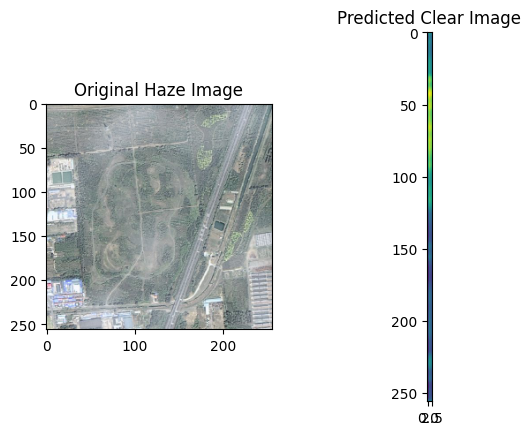

In [23]:
# Predict clear images from the moderate test dataset
predicted_images = model.predict(next(iter(test_moderate_ds)))

# Function to visualize images
def visualize_images(original, predicted, title_original, title_predicted):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(original[0])
    axes[0].set_title(title_original)
    axes[1].imshow(predicted[0])
    axes[1].set_title(title_predicted)
    plt.show()


# Visualize a sample image from the moderate test dataset
sample_batch = next(iter(test_moderate_ds))
visualize_images(sample_batch[0], predicted_images[0], 'Original Haze Image', 'Predicted Clear Image')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


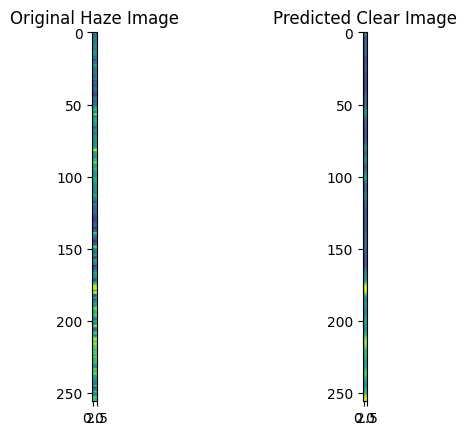

In [25]:
import matplotlib.pyplot as plt

def visualize_images(original, predicted, title_original, title_predicted):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(original[0])
    axes[0].set_title(title_original)
    axes[1].imshow(predicted[0])
    axes[1].set_title(title_predicted)
    plt.show()

# Predict clear images from the moderate test dataset
sample_input_batch, sample_target_batch = next(iter(test_moderate_ds))
predicted_images = model.predict(sample_input_batch)

# Visualize the first sample image and its predicted clear image
visualize_images(sample_input_batch[0], predicted_images[0], 'Original Haze Image', 'Predicted Clear Image')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step


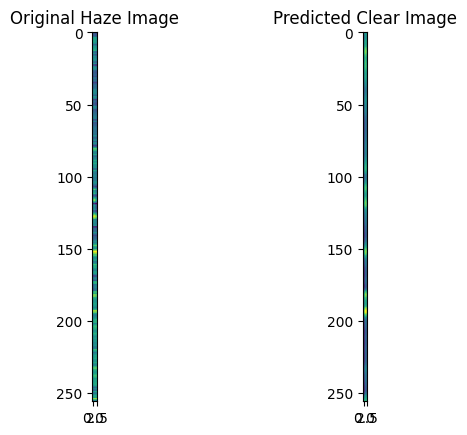

In [27]:
import matplotlib.pyplot as plt

def visualize_images(original, predicted, title_original, title_predicted):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(original[0])
    axes[0].set_title(title_original)
    axes[1].imshow(predicted[0])
    axes[1].set_title(title_predicted)
    plt.show()

# Predict clear images from the moderate test dataset
sample_input_batch, sample_target_batch = next(iter(test_moderate_ds))
predicted_images = model.predict(sample_input_batch)

# Visualize the first sample image and its predicted clear image
visualize_images(sample_input_batch[0], predicted_images[0], 'Original Haze Image', 'Predicted Clear Image')
